<a href="https://colab.research.google.com/github/wikistat/High-Dimensional-Deep-Learning/blob/master/AutoEncoder/Autoencoders_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 
<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 150px; display: inline"  alt="Wikistat"/></a>
<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" width=400,  style="float:right;  display: inline" alt="IMT"/> </a>
    
</center>

# Files & Data (Google Colab)

If you're running this notebook on Google colab, you do not have access to the `solutions` folder you get by cloning the repository locally. 

The following lines will allow you to build the folders and the files you need for this TP.

**WARNING 1** Do not run this line localy.
**WARNING 2** The magic command `%load` does not work work on google colab, you will have to copy-paste the solution on the notebook.

In [1]:
! mkdir image
! wget . https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_decoder.png
! wget . https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_vae.png
! wget image https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/image/vae_2.svg
! wget image https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/image/vae_3.svg
! mkdir solutions
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/compare_sparsity_decoded_imgs.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/compare_sparsity_encoded_imgs.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/convolutional_autoencoder.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/decoded_images_both_method.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/decoder_vae.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/generate_single_sample.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/simple_autoencoder.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/train_denoise_model.py

mkdir: impossible de créer le répertoire «image»: Le fichier existe
--2022-10-19 08:10:17--  http://./
Résolution de . (.)… échec : Échec temporaire dans la résolution du nom.
wget : impossible de résoudre l’adresse de l’hôte « . »
--2022-10-19 08:10:17--  https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_decoder.png
Résolution de github.com (github.com)… 140.82.121.4
Connexion à github.com (github.com)|140.82.121.4|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/vae_mlp_decoder.png [suivant]
--2022-10-19 08:10:17--  https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/vae_mlp_decoder.png
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)

--2022-10-19 08:10:20--  http://solutions/
Résolution de solutions (solutions)… échec : Échec temporaire dans la résolution du nom.
wget : impossible de résoudre l’adresse de l’hôte « solutions »
--2022-10-19 08:10:20--  https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/convolutional_autoencoder.py
Résolution de github.com (github.com)… 140.82.121.4
Connexion à github.com (github.com)|140.82.121.4|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/solutions/convolutional_autoencoder.py [suivant]
--2022-10-19 08:10:20--  https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/solutions/convolutional_autoencoder.py
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connexion à raw.githubusercontent.com (raw.g

requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1293 (1,3K) [text/plain]
Sauvegarde en : « train_denoise_model.py »

train_denoise_model 100%[===================>]   1,26K  --.-KB/s    ds 0s      

2022-10-19 08:10:22 (42,7 MB/s) — « train_denoise_model.py » sauvegardé [1293/1293]

Terminé — 2022-10-19 08:10:22 —
Temps total effectif : 0,3s
Téléchargés : 1 fichiers, 1,3K en 0s (42,7 MB/s)


# High Dimensional & Deep Learning : Autoencoders

##  What is an Autoencoder ?

<P style="text-align:center"><img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg" style="float:center; display: inline" alt="schema"/></P>
<i>Autoencoder architecture</i>

## Objective 

During this TP  we will build different autoencoders with Keras and Tensorflow. Here are the main objectives :

* Build a autoencoder based on simple perceptron layers.
* Add regularization on layers and understand its effects.
* Build a convolutional autoencoder.
* Use a convolutional autoencoder to solve denoising problems.
* Manipulate the library in order to get and observe the result at different points of the dataflow.


The dataset used all along this TP is the MNIST dataset.

## Library

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.preprocessing.image as kpi
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
import tensorflow.keras.regularizers as kr
import numpy as np

import matplotlib.pyplot as plt
import tensorflow
tensorflow.__version__

2022-10-19 08:11:43.135091: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


'2.4.0'

## Dataset 
As we won't apply any supervised algorithm in this TP, we do not need to load the `Y` variable.

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

As seen in the previous TP, it is better to normalize the dataset before to apply algorithm on it.

(60000, 28, 28)
(10000, 28, 28)


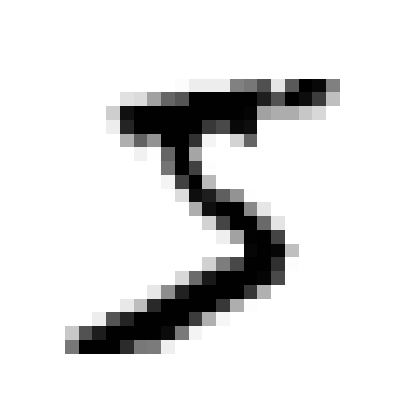

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

fig  = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
x = kpi.img_to_array(x_train[0])
ax.imshow(x[:,:,0], interpolation='nearest', cmap="binary")
ax.grid(False)
plt.axis('off')
plt.show()

## Building a simple autoencoder

We will first build a very simple architecture where :

* the **encoder layer** : is a `Dense` layer composed of 32 neurons (the latent variable) with a `Relu` activation function :
$$relu(x) = max(0,x)$$
* the **decoded layer** : is a `Dense` layer composed of  784 neurons (the input dimension) with a `Sigmoid`activation function.
$$sigmoid(x) = \frac{1}{1+\text{e}^x}$$




We first reshape the data form to be 1D.

In [5]:
x_train_flatten = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flatten = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Write the model

**Exercice** : write the simple model described above in Keras.

In [6]:
n_latent = 32
n_input = 784

In [9]:
# %load solutions/simple_autoencoder.py
autoencoder = km.Sequential(name = "simple_autoencoder")
autoencoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,),name="encoder_layer"))
autoencoder.add(kl.Dense(n_input, activation='sigmoid', name = "decoder_layer" ))
autoencoder.summary()

2022-10-19 08:19:17.151716: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-19 08:19:17.160087: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-19 08:19:17.243967: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-19 08:19:17.244061: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-10-19 08:19:17.269310: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-10-19 08:19:17.269485: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

Model: "simple_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer (Dense)        (None, 32)                25120     
_________________________________________________________________
decoder_layer (Dense)        (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


We then learn the model. Note that the target variable is the original image.

In [13]:
help(autoencoder.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256, validation_data=(x_test_flatten, x_test_flatten))

2022-10-19 08:25:42.331677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-19 08:25:42.373630: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz


Epoch 1/25


2022-10-19 08:25:43.151607: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


  1/235 [..............................] - ETA: 5:27 - loss: 0.6930

2022-10-19 08:25:43.991296: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


235/235 [==============================] - 3s 5ms/step - loss: 0.3814 - val_loss: 0.1876
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1789 - val_loss: 0.1534
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1491 - val_loss: 0.1333
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1310 - val_loss: 0.1210
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1201 - val_loss: 0.1129
Epoch 6/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1124 - val_loss: 0.1067
Epoch 7/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1069 - val_loss: 0.1023
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1028 - val_loss: 0.0992
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0996 - val_loss: 0.0968
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 11/2

**Question** : We use the binary cross entropy here as in the original paper [1](https://arxiv.org/pdf/1312.6114.pdf). Does it seem an intuitive choice? Why?
How is the loss evolving during training?

### Check outputs

We will no check how the model performs. We produce first the encoded-decoded images.

In [14]:
decoded_test_imgs = autoencoder.predict(x_test_flatten)

The following function displays both the input and the output of the autoencoder model.

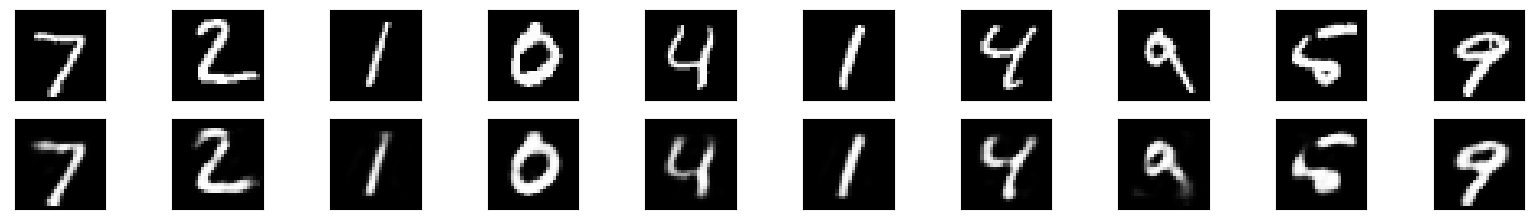

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Question** : What can you say about this results?



### Check latent variable

The Keras model that we have written above does not allow us to retrieve the latent variables. 
In order to do so, we have to re-write the model in order to get this variable later.

We first write the encoder part.

In [16]:
encoder = km.Sequential(name="EncoderModel")
encoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,),name="encoder_layer"))

We then write the decoder as  another independent model

In [17]:
decoder = km.Sequential(name="DecoderModel")
decoder.add(kl.Dense(n_input, activation='sigmoid', input_shape =(n_latent,), name = "decoded_layer" ))

We finally write the autoencoder model by adding the two previous models

In [18]:
autoencoder = km.Sequential(name="EncoderDecoder")
autoencoder.add(encoder)
autoencoder.add(decoder)

The model is well composed of the association of the two previous models.

In [19]:
autoencoder.summary()

Model: "EncoderDecoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
EncoderModel (Sequential)    (None, 32)                25120     
_________________________________________________________________
DecoderModel (Sequential)    (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


You can access the two sub models with the following syntax

In [20]:
autoencoder.get_layer("EncoderModel").summary()

Model: "EncoderModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer (Dense)        (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


The model can then be learned by the same way.

In [24]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #on considère qu'un pixel est blanc ou noir (0 ou 1) donc on peut considérer qu'on a 2 classes
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256, validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.0944 - val_loss: 0.0933
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.0942 - val_loss: 0.0931
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.0944 - val_loss: 0.0931
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 5/25
235/235 [==============================] - 1s 4ms/step - loss: 0.0941 - val_loss: 0.0931
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0942 - val_loss: 0.0930
Epoch 7/25
235/235 [==============================] - 1s 4ms/step - loss: 0.0942 - val_loss: 0.0929
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.0942 - val_loss: 0.0930
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0940 - val_loss: 0.0930
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0940 - val_loss: 0.0930

**Question** What can you say about the loss value of the model ? 

We can now access and produce easily the latent variables.

In [22]:
encoded_imgs = encoder.predict(x_test_flatten)
encoded_imgs.shape

(10000, 32)

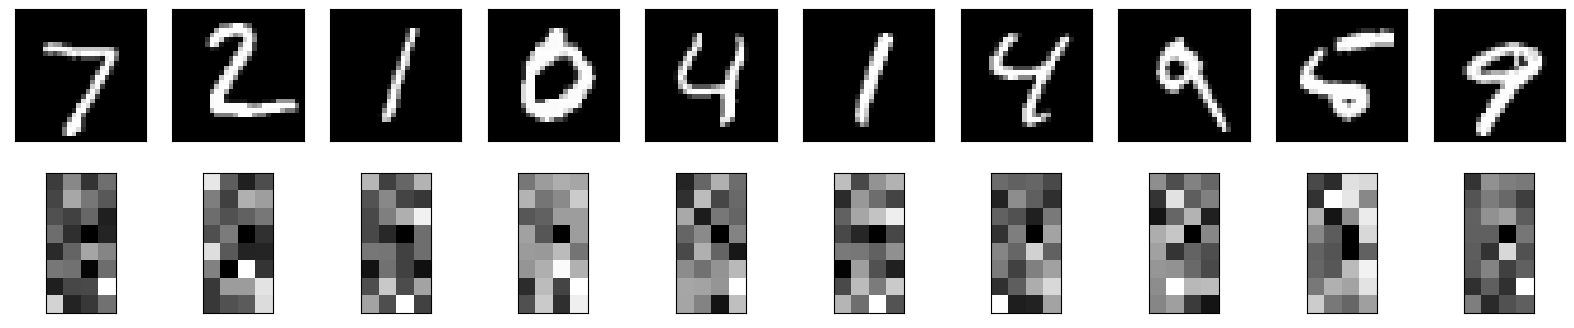

In [23]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded imgs
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

You can produce the decoded images by :
* Using the decoded part on the encoded images.
* Using the whole architecture on the original image.

**Exercise** : Check that both methods produce the same results.

Are all pair of decoded images from both methods equal : False 


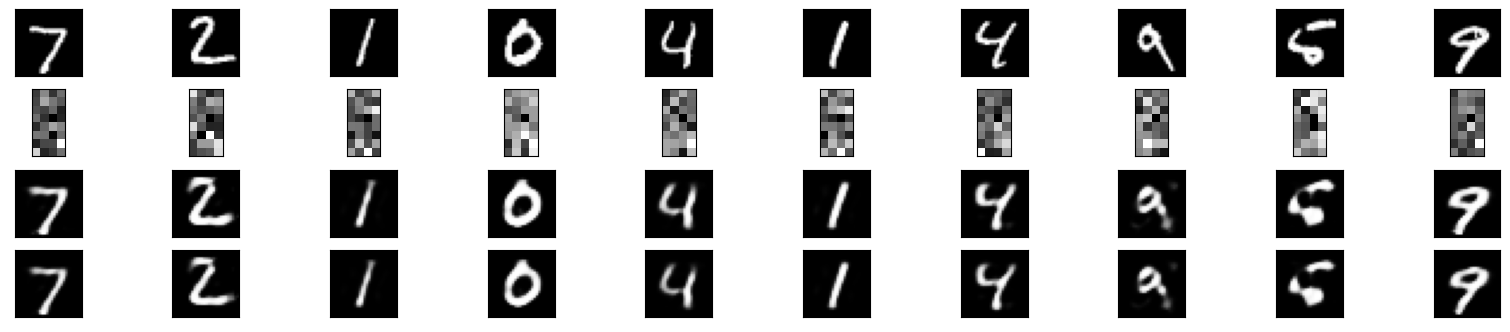

In [26]:
# %load solutions/decoded_images_both_method.py
decoded_imgs_1 = decoder.predict(encoded_imgs)
decoded_imgs_2 = autoencoder.predict(x_test_flatten)
print("Are all pair of decoded images from both methods equal : %s " %np.all(decoded_imgs_1==decoded_imgs_2))

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded imgs
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded imgs
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded imgs
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_imgs_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Sparse autoencoder

In the previous example the autoencoder is only constrained by the size of the hidden layer. 

In the following figure you can see the distribution of the number of latent variables set to zero for the 10.000 test images.

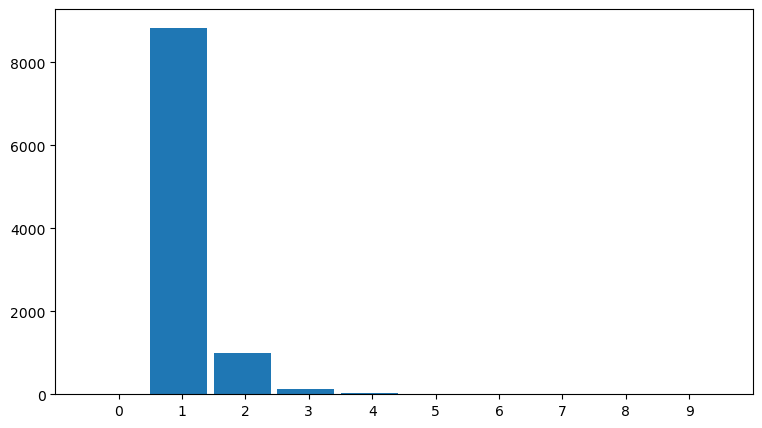

In [27]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
ax.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
plt.show()

Another way to get a sparser encoded representation of the images is to add a *sparsity constraint* on the activity function of the hidden layer. 

Regularizers enable to avoid overfitting by adding some constraint on the weights we want to control. 

Cost function = Loss (say, binary cross-entropy) + Regularization term 

Cost function = Loss + $\lambda$ $\sum w$, where in our case $\lambda = 10e-5$ and $w$ are the weights of the encoder model.

In [28]:
l = 10e-5

sparse_encoder = km.Sequential(name="SparseEncoderModel")
sparse_encoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,), activity_regularizer=kr.l1(l) ,name="encoder_layer"))

sparse_decoder = km.Sequential(name="SparseDecoderModel")
sparse_decoder.add(kl.Dense(n_input, activation='sigmoid', input_shape =(n_latent,), name = "decoded_layer" ))

sparse_autoencoder = km.Sequential(name="SparseEncoderDecoder")
sparse_autoencoder.add(sparse_encoder)
sparse_autoencoder.add(sparse_decoder)


We can now train the model as previously.

In [29]:
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sparse_autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256,validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.3913 - val_loss: 0.2002
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1899 - val_loss: 0.1632
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1594 - val_loss: 0.1443
Epoch 4/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1423 - val_loss: 0.1329
Epoch 5/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1317 - val_loss: 0.1245
Epoch 6/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1242 - val_loss: 0.1186
Epoch 7/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1187 - val_loss: 0.1142
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1147 - val_loss: 0.1112
Epoch 9/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1118 - val_loss: 0.1089
Epoch 10/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1075

**Question** : What can you say on the loss function compared with the previous model? 

valeurs de la loss + grande

**Exercise**  : Check that the encoded images obtained with the sparse autoencoder are indeed sparser than the ones obtained by the first autoencoder. 

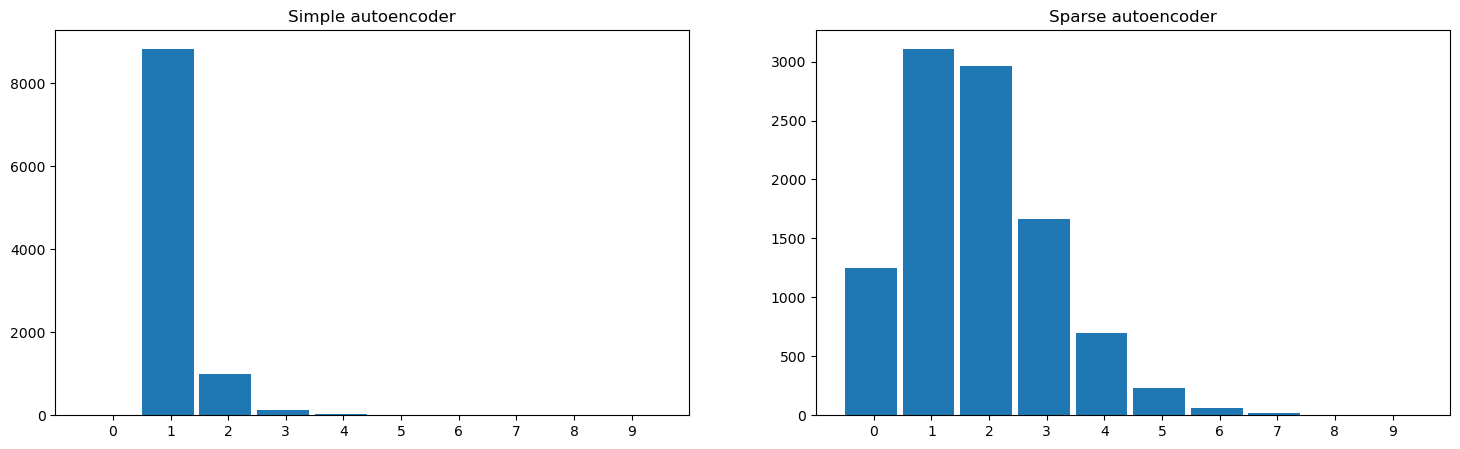

In [31]:
# %load solutions/compare_sparsity_encoded_imgs.py
sparse_encoded_imgs = sparse_encoder.predict(x_test_flatten)
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1,2,1)
ax.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_title("Simple autoencoder")
ax = fig.add_subplot(1,2,2)
ax.hist(np.sum(sparse_encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_title("Sparse autoencoder")
plt.show()

**Exercise** : Compare the decoded images obtained by the first and the sparse model.

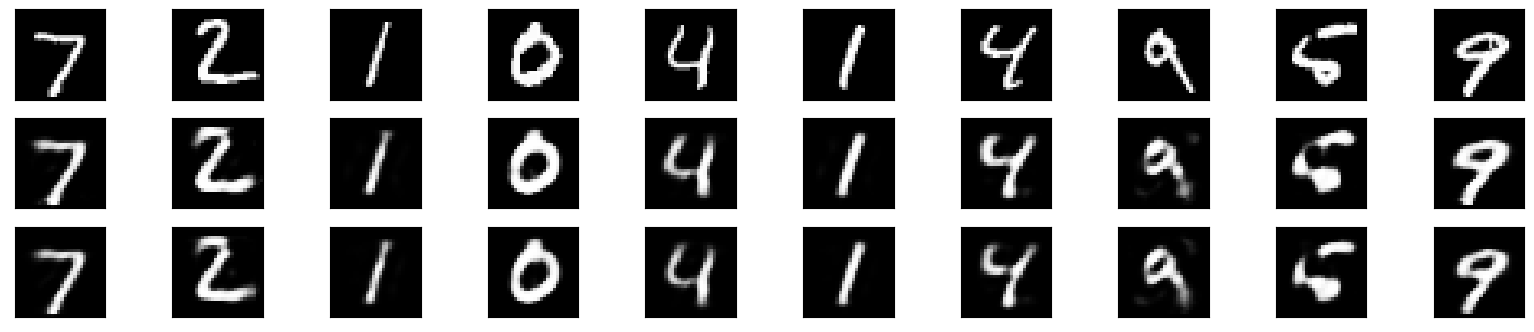

In [33]:
# %load solutions/compare_sparsity_decoded_imgs.py
sparse_decoded_imgs = sparse_decoder.predict(sparse_encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display simple reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display sparse reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(sparse_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional Autoencoder

In the previous part, we have seen very simple autoencoders where both encoder and decoder parts are composed of a single layer. They both can be composed of more layers (deep autoencoder) and with differents types of layers.

As seen in the previous TP, convolutional layers are the best layers to use when dealing with images. 

**Exercise** : Implement a convolutional Autoencoder with the following architecture: 

`Encoder`
* A 2d convolutional layer, 16 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2
* A 2d convolutial layer, 8 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2
* A 2d convolutial layer, 8 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2

`Decoder`
* A 2d convolutional layer, 8 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 8 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 16 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 1 filters of size 3x3, with SIGMOID activation


*All padding are `SAME` padding and all convolutional activation function but last are `RELU`*



In [67]:
conv_encoder = km.Sequential(name="ConvEncoderModel")

conv_encoder.add(kl.Conv2D(16, 3, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, 3, activation = 'relu', padding = 'same'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, 3, activation = 'relu', padding = 'same'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding='same'))

In [68]:
conv_decoder = km.Sequential(name="DecoderModel")

conv_decoder.add(kl.Conv2D(8, 3, activation = 'relu', input_shape = (4, 4, 8), padding = 'same'))
conv_decoder.add(kl.UpSampling2D(size=(2, 2)))
conv_decoder.add(kl.Conv2D(8, 3, activation = 'relu', padding = 'same'))
conv_decoder.add(kl.UpSampling2D(size=(2, 2)))
conv_decoder.add(kl.Conv2D(16, 3, activation = 'relu'))
conv_decoder.add(kl.UpSampling2D(size=(2, 2)))
conv_decoder.add(kl.Conv2D(1, 3, activation = 'sigmoid', padding = 'same'))

In [57]:
# %load solutions/convolutional_autoencoder.py
x_train_conv = np.expand_dims(x_train, axis=-1)
x_test_conv = np.expand_dims(x_test, axis=-1)


conv_encoder = km.Sequential(name="ConvEncoderModel")
conv_encoder.add(kl.Conv2D(16, (3,3) , activation='relu', input_shape=(28,28,1) , padding='same' ))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl. MaxPooling2D((2, 2), padding='same'))

conv_decoder = km.Sequential(name="ConvDecoderModel")
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', input_shape = (4, 4, 8), padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(16, (3, 3), activation='relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


In [69]:
conv_decoder.summary()

Model: "DecoderModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_24 (UpSampling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_26 (UpSampling (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 1)        

In [70]:
conv_autoencoder = km.Sequential(name="ConvAutoencoderModel")
conv_autoencoder.add(conv_encoder)
conv_autoencoder.add(conv_decoder)
conv_autoencoder.summary()

Model: "ConvAutoencoderModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvEncoderModel (Sequential (None, 4, 4, 8)           1904      
_________________________________________________________________
DecoderModel (Sequential)    (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [71]:
x_train_conv = np.expand_dims(x_train, axis=-1)
x_test_conv = np.expand_dims(x_test, axis=-1)

conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_conv, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_conv, x_test_conv))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.4432 - val_loss: 0.1714
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1619 - val_loss: 0.1416
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1398 - val_loss: 0.1308
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1297 - val_loss: 0.1232
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1234 - val_loss: 0.1192
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1198 - val_loss: 0.1165
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1167 - val_loss: 0.1139
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1148 - val_loss: 0.1121
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1131 - val_loss: 0.1105
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1115 - val_lo

In [72]:
conv_autoencoder.evaluate(x_train_conv, x_train_conv)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.1103


0.11028044670820236

**Question** What can you say about the loss function?

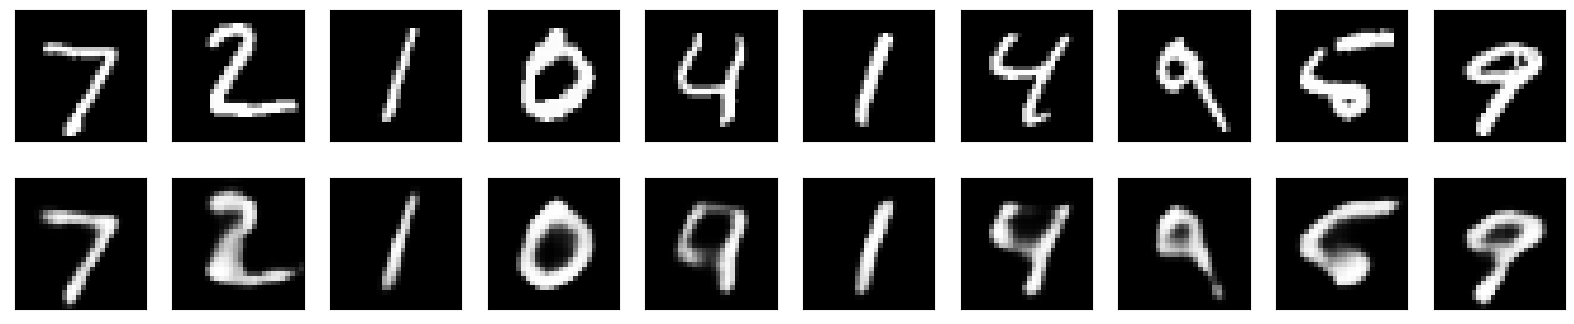

In [73]:
encoded_imgs = conv_encoder.predict(x_test_conv)
decoded_imgs = conv_autoencoder.predict(x_test_conv)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Application to denoising

We now know how to build a convolutional autoencoder. 

We will now see how it can be used to solve a denoising problem. 

We first create fake noisy data.

In [74]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_conv.shape) 
x_test_noisy = x_test_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_conv.shape) 

# Value greater than 1 are set to 1 and value lower than 0 are set to zero
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Let's observe the noise we created.

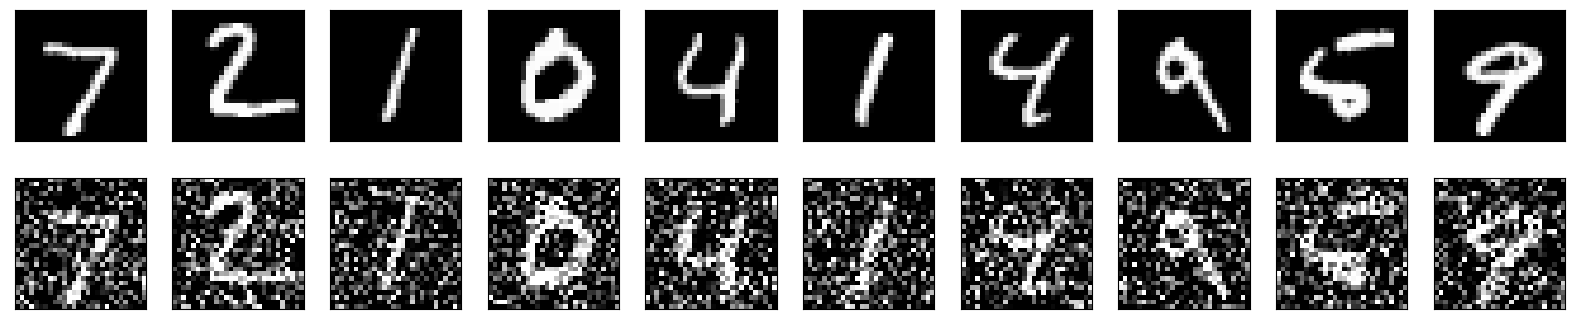

In [75]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy data
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise** : Now let's train the same convolutional model that we built above. But let's train this model with noisy data as an input and the original data as the output.

In [77]:
# %load solutions/train_denoise_model.py
conv_encoder = km.Sequential(name="ConvEncoderModel")
conv_encoder.add(kl.Conv2D(16, (3,3) , activation='relu', input_shape=(28,28,1) , padding='same' ))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl.MaxPooling2D((2, 2), padding='same'))
conv_encoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_encoder.add(kl. MaxPooling2D((2, 2), padding='same'))

conv_decoder = km.Sequential(name="ConvDecoderModel")
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', input_shape = (4, 4, 8), padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(8, (3, 3), activation='relu', padding='same'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(16, (3, 3), activation='relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))
conv_decoder.add(kl.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

conv_autoencoder = km.Sequential(name="ConvAutoencoderModel")
conv_autoencoder.add(conv_encoder)
conv_autoencoder.add(conv_decoder)

conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_noisy, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test_conv))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4203 - val_loss: 0.2078
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1995 - val_loss: 0.1818
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1805 - val_loss: 0.1706
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1696 - val_loss: 0.1614
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1611 - val_loss: 0.1553
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1556 - val_loss: 0.1508
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1512 - val_loss: 0.1469
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1477 - val_loss: 0.1443
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1453 - val_loss: 0.1424
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1434 - val_los

Now, we pass the noisy test data into the trained autoencorder in order to denoise this data.

In [78]:
x_test_denoised = conv_autoencoder.predict(x_test_noisy)

Here are the results of the denoised data.

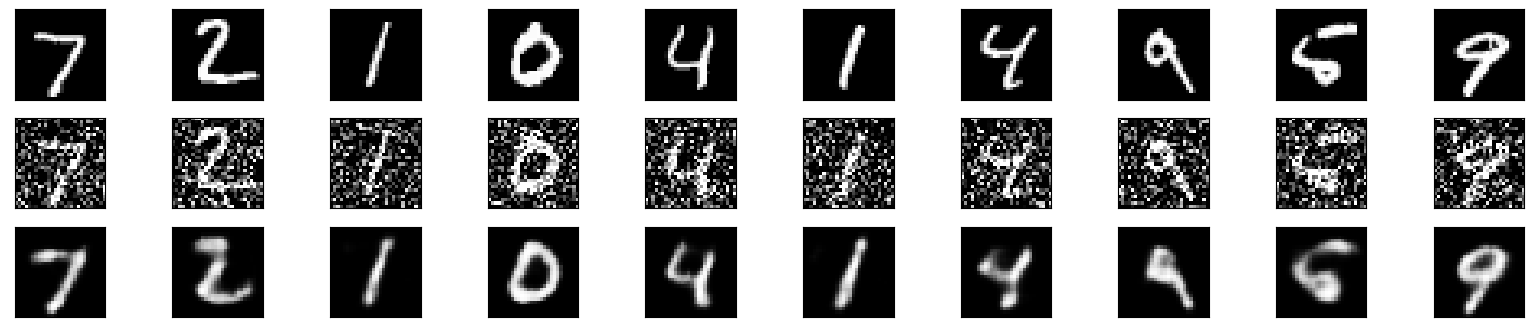

In [79]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy data
    ax = plt.subplot(3, n, i + n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # denoised data
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise** : Play with different architectures to decrease loss function